In [1]:
#import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for modeling 
from sklearn.linear_model import LinearRegression
from sklearn import metrics, linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, median_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from numpy import NaN
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score, median_absolute_error


import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.stats import pearsonr
%matplotlib inline

In [3]:
data = pd.read_csv('data/final_data.csv')

data.head()

,Unnamed: 0,index,Country,Code_x,Year,cereals,potatoes,beans,sugar,soybeans,palm-oil,cassava,rapeseed,total_yield,Average monthly precipitation,AverageTemperature,AverageTemperatureUncertainty,Surface temperature anomaly,Code,Population
0,0,0,Afghanistan,AFG,1961,11151.0,86667.0,0.0,250000.0,0.0,0.0,0.0,0.0,347818,2.283719,14.064917,0.398083,-0.05,AFG,9169000.0
1,1,1,Afghanistan,AFG,1962,10790.0,76667.0,0.0,250000.0,0.0,0.0,0.0,0.0,337457,1.875860,13.768667,0.406167,-0.33,AFG,9351000.0
2,2,2,Afghanistan,AFG,1963,9858.0,81333.0,0.0,250000.0,0.0,0.0,0.0,0.0,341191,2.139667,15.033417,0.401250,0.83,AFG,9543000.0
3,3,3,Afghanistan,AFG,1964,10828.0,86000.0,0.0,250000.0,0.0,0.0,0.0,0.0,346828,2.272978,13.084917,0.449417,-1.03,AFG,9745000.0
4,4,4,Afghanistan,AFG,1965,10989.0,88000.0,0.0,255000.0,0.0,0.0,0.0,0.0,353989,2.342783,14.101833,0.408083,0.04,AFG,9956000.0


In [7]:
df = data.copy()

df.dropna(inplace = True)

df.head()

,Unnamed: 0,index,Country,Code_x,Year,cereals,potatoes,beans,sugar,soybeans,palm-oil,cassava,rapeseed,total_yield,Average monthly precipitation,AverageTemperature,AverageTemperatureUncertainty,Surface temperature anomaly,Code,Population
0,0,0,Afghanistan,AFG,1961,11151.0,86667.0,0.0,250000.0,0.0,0.0,0.0,0.0,347818,2.283719,14.064917,0.398083,-0.05,AFG,9169000.0
1,1,1,Afghanistan,AFG,1962,10790.0,76667.0,0.0,250000.0,0.0,0.0,0.0,0.0,337457,1.875860,13.768667,0.406167,-0.33,AFG,9351000.0
2,2,2,Afghanistan,AFG,1963,9858.0,81333.0,0.0,250000.0,0.0,0.0,0.0,0.0,341191,2.139667,15.033417,0.401250,0.83,AFG,9543000.0
3,3,3,Afghanistan,AFG,1964,10828.0,86000.0,0.0,250000.0,0.0,0.0,0.0,0.0,346828,2.272978,13.084917,0.449417,-1.03,AFG,9745000.0
4,4,4,Afghanistan,AFG,1965,10989.0,88000.0,0.0,255000.0,0.0,0.0,0.0,0.0,353989,2.342783,14.101833,0.408083,0.04,AFG,9956000.0


In [8]:
df.columns

Index(['Unnamed: 0', 'index', 'Country', 'Code_x', 'Year', 'cereals',
       'potatoes', 'beans', 'sugar', 'soybeans', 'palm-oil', 'cassava',
       'rapeseed', 'total_yield', 'Average monthly precipitation',
       'AverageTemperature', 'AverageTemperatureUncertainty',
       'Surface temperature anomaly', 'Code', 'Population'],
      dtype='object')

## Feature Engineering

In [9]:
df['total_yield'].diff()

0             NaN
1        -10361.0
2          3734.0
3          5637.0
4          7161.0
           ...   
12797      2422.0
12798       870.0
12804    134625.0
12805     45839.0
12806     84042.0
Name: total_yield, Length: 7708, dtype: float64

In [10]:
df['yield_change'] = df['total_yield'].diff()

df.head()

,Unnamed: 0,index,Country,Code_x,Year,cereals,potatoes,beans,sugar,soybeans,...,cassava,rapeseed,total_yield,Average monthly precipitation,AverageTemperature,AverageTemperatureUncertainty,Surface temperature anomaly,Code,Population,yield_change
0,0,0,Afghanistan,AFG,1961,11151.0,86667.0,0.0,250000.0,0.0,...,0.0,0.0,347818,2.283719,14.064917,0.398083,-0.05,AFG,9169000.0,NaN
1,1,1,Afghanistan,AFG,1962,10790.0,76667.0,0.0,250000.0,0.0,...,0.0,0.0,337457,1.875860,13.768667,0.406167,-0.33,AFG,9351000.0,-10361.0
2,2,2,Afghanistan,AFG,1963,9858.0,81333.0,0.0,250000.0,0.0,...,0.0,0.0,341191,2.139667,15.033417,0.401250,0.83,AFG,9543000.0,3734.0
3,3,3,Afghanistan,AFG,1964,10828.0,86000.0,0.0,250000.0,0.0,...,0.0,0.0,346828,2.272978,13.084917,0.449417,-1.03,AFG,9745000.0,5637.0
4,4,4,Afghanistan,AFG,1965,10989.0,88000.0,0.0,255000.0,0.0,...,0.0,0.0,353989,2.342783,14.101833,0.408083,0.04,AFG,9956000.0,7161.0


In [23]:
#defining change between yields 
df['yield_percent_change'] = df['total_yield'].pct_change()

#Defining goal percent change, as defined by scientists. 
df['goal_percent_change'] = 0.024

#Year as category
df['Year'] = df['Year'].astype('category')

#difference yield and difference growth see which is growing faster 
df['yield_goal_diff'] = df['goal_percent_change'] - df['yield_percent_change']

#fill na for modeling 
df['yield_goal_diff'].fillna(0, inplace = True)

#Country as category
df['Country'] = df['Country'].astype('category')

#Convering country to a number 
df['country_cat'] = df['Country'].cat.codes

#Showing projected temps based on anomalies 
df['temp_anomalies'] = df['AverageTemperature'] + df['Surface temperature anomaly']

#Temperature percent change by year and country 

df['temp_pct_change'] = df['temp_anomalies'].pct_change()

#Precipittion percent change

df['precip_change'] = df['Average monthly precipitation'].pct_change()

df['precip_change'].fillna(0, inplace = True)


#Yield changes 

df['yield_percent_change'].fillna(0,inplace = True)
df['yield_change'].fillna(0,inplace = True)

#Multiplying precipitation and temperature 

df['precip_temp'] = df['AverageTemperature'] * df['Average monthly precipitation']

In [24]:
df.columns

Index(['Unnamed: 0', 'index', 'Country', 'Code_x', 'Year', 'cereals',
       'potatoes', 'beans', 'sugar', 'soybeans', 'palm-oil', 'cassava',
       'rapeseed', 'total_yield', 'Average monthly precipitation',
       'AverageTemperature', 'AverageTemperatureUncertainty',
       'Surface temperature anomaly', 'Code', 'Population', 'yield_change',
       'yield_percent_change', 'goal_percent_change', 'yield_goal_diff',
       'country_cat', 'temp_anomalies', 'temp_pct_change', 'precip_change',
       'precip_temp'],
      dtype='object')

In [25]:
df.isnull().sum()

Unnamed: 0                       0
index                            0
Country                          0
Code_x                           0
Year                             0
cereals                          0
potatoes                         0
beans                            0
sugar                            0
soybeans                         0
palm-oil                         0
cassava                          0
rapeseed                         0
total_yield                      0
Average monthly precipitation    0
AverageTemperature               0
AverageTemperatureUncertainty    0
Surface temperature anomaly      0
Code                             0
Population                       0
yield_change                     0
yield_percent_change             0
goal_percent_change              0
yield_goal_diff                  0
country_cat                      0
temp_anomalies                   0
temp_pct_change                  1
precip_change                    0
precip_temp         

In [26]:
df['temp_pct_change'].fillna(0, inplace = True)

In [27]:
X = df[['Year', 'country_cat','AverageTemperature', 'Average monthly precipitation', 'Population', 'precip_temp', 'temp_anomalies']]

y = df['total_yield']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 42)

# Projected Data
## Examining + preparing data for model


### Import projected Data

In [35]:
df_proj = pd.read_csv('data/projected_data.csv')



In [36]:
df_proj.to_csv('data/projected_data.csv')

In [38]:
#Messed up value in df, fix 

df_proj['Population'].replace({7100000000.0: 71000000.0}, inplace = True)

In [39]:
df_proj.head()

,Year,reference,mitigation,temp_mitigation,temp_no_mitigation,temp_with_mitigation,precip_reference,precip_mitigation,precip_no_mitigation,precip_with_mitigation,Population
0,2000,0.52,0.52,20.089,20.089,20.089,0.02900,0.02900,9.16500,9.16500,55695423.87
1,2001,0.75,0.75,20.319,20.319,20.319,0.17944,0.18852,9.31544,9.32452,56447839.51
2,2002,0.91,0.91,20.479,20.479,20.479,0.32988,0.34804,9.46588,9.48404,57200584.36
3,2003,0.96,0.74,20.529,20.529,20.309,0.48032,0.50756,9.61632,9.64356,57955759.10
4,2004,0.93,0.89,20.499,20.499,20.459,0.63076,0.66708,9.76676,9.80308,58715818.98


In [40]:
mitigation = df_proj[['Year', 'mitigation', 'temp_with_mitigation', 
                      'precip_mitigation', 'precip_with_mitigation', 'Population']]

no_mitigation = df_proj[['Year', 'reference','precip_reference','temp_no_mitigation', 'precip_no_mitigation', 'Population']]


In [41]:
df_features = df[['Year', 'Population', 'total_yield', 'AverageTemperature', 'temp_pct_change',
                  'Average monthly precipitation', 'precip_change', 'precip_temp']]

In [42]:
means = df_features.groupby('Year').mean()
means.reset_index(inplace = True)
means.columns

Index(['Year', 'Population', 'total_yield', 'AverageTemperature',
       'temp_pct_change', 'Average monthly precipitation', 'precip_change',
       'precip_temp'],
      dtype='object')

In [43]:
means.head()

,Year,Population,total_yield,AverageTemperature,temp_pct_change,Average monthly precipitation,precip_change,precip_temp
0,1961,2.148764e+07,432506.526316,19.461407,-0.280834,10.239212,2.275065,220.210559
1,1962,2.189171e+07,437669.917293,19.263760,-0.081943,10.012969,-0.024870,214.254432
2,1963,2.231135e+07,446792.368421,19.263734,-0.058401,10.381205,0.109248,222.061870
3,1964,2.274958e+07,452464.255639,19.201430,-0.036764,9.892779,-0.048685,211.078204
4,1965,2.320826e+07,459991.939850,19.128979,-0.085096,9.828913,0.012219,206.658077


In [44]:
#mitigation feature engineering 

mitigation['temp_pct_change'] = mitigation['temp_with_mitigation'].pct_change()

mitigation['precip_change'] = mitigation['precip_with_mitigation'].pct_change()

mitigation['precip_temp'] = mitigation['temp_with_mitigation'] * mitigation['precip_with_mitigation']

mitigation.fillna(0.01, inplace = True)

In [45]:
#no mitigation feature engineering

no_mitigation['temp_pct_change'] = no_mitigation['temp_no_mitigation'].pct_change()

no_mitigation['precip_change'] = no_mitigation['precip_no_mitigation'].pct_change()

no_mitigation['precip_temp'] = no_mitigation['temp_no_mitigation'] * no_mitigation['precip_no_mitigation']

no_mitigation.fillna(.01, inplace = True)

### Merge mitigation data with old data to build larger df 

In [46]:
mitigation_2013 = mitigation[mitigation['Year'] > 2013]

mitigation_2013.rename(columns = {
    'temp_with_mitigation': 'AverageTemperature',
    'precip_with_mitigation': 'Average monthly precipitation',
    'precip-temp': 'precip_temp',
    
    
}, inplace = True)

mitigation_ready = mitigation_2013[['Year','Population', 'AverageTemperature', 'temp_pct_change',
       'Average monthly precipitation', 'precip_change', 'precip_temp']]

mitigation_merged  = pd.concat([means, mitigation_ready])

mitigation_merged['log_pop'] = np.log1p(mitigation_merged['Population'])


mitigation_merged.tail()

,Year,Population,total_yield,AverageTemperature,temp_pct_change,Average monthly precipitation,precip_change,precip_temp,log_pop
96,2096,101486928.8,NaN,22.029,-0.002716,15.604,0.001155,343.740516,18.435441
97,2097,101540266.0,NaN,21.909,-0.005447,15.622,0.001154,342.262398,18.435966
98,2098,101585994.9,NaN,22.009,0.004564,15.640,0.001152,344.220760,18.436416
99,2099,101623887.9,NaN,22.029,0.000909,15.658,0.001151,344.930082,18.436789
100,2100,101653673.6,NaN,21.929,-0.004539,15.676,0.001150,343.759004,18.437082


In [47]:
mitigation_merged[mitigation_merged['Year'] > 2018].head(10)

,Year,Population,total_yield,AverageTemperature,temp_pct_change,Average monthly precipitation,precip_change,precip_temp,log_pop
19,2019,70656328.67,NaN,20.929,-0.006645,12.19588,0.013253,255.247573,18.073338
20,2020,71000000.00,NaN,21.019,0.004300,12.35540,0.013080,259.698153,18.078190
21,2021,72209675.10,NaN,21.119,0.004758,12.51492,0.012911,264.302595,18.095085
22,2022,72970971.34,NaN,21.179,0.002841,12.67444,0.012746,268.431965,18.105572
23,2023,73722198.07,NaN,21.369,0.008971,12.83396,0.012586,274.248891,18.115815
24,2024,74464094.73,NaN,21.289,-0.003744,12.99348,0.012430,276.618196,18.125828
25,2025,75197190.49,NaN,21.339,0.002349,13.15300,0.012277,280.671867,18.135624
26,2026,75921245.16,NaN,21.489,0.007029,13.20148,0.003686,283.686604,18.145207
27,2027,76635838.45,NaN,21.339,-0.006980,13.24996,0.003672,282.740896,18.154575
28,2028,77341140.30,NaN,21.579,0.011247,13.29844,0.003659,286.967037,18.163737


In [48]:
no_mitigation_2013 = no_mitigation[no_mitigation['Year'] > 2013]

no_mitigation_2013.rename(columns = {
    'temp_no_mitigation': 'AverageTemperature',
    'precip_no_mitigation': 'Average monthly precipitation',
    'precip-temp': 'precip_temp'
    
    
}, inplace = True)

no_mitigation_ready = no_mitigation_2013[['Year','Population', 'AverageTemperature', 'temp_pct_change',
       'Average monthly precipitation', 'precip_change', 'precip_temp']]


no_mitigation_merged  = pd.concat([means, no_mitigation_ready])

no_mitigation_merged['log_pop'] = np.log1p(no_mitigation_merged['Population'])

no_mitigation_merged.tail()

,Year,Population,total_yield,AverageTemperature,temp_pct_change,Average monthly precipitation,precip_change,precip_temp,log_pop
96,2096,101486928.8,NaN,29.119,0.003446,31.960,0.010881,930.643240,18.435441
97,2097,101540266.0,NaN,29.159,0.001374,32.304,0.010763,941.952336,18.435966
98,2098,101585994.9,NaN,29.219,0.002058,32.648,0.010649,953.941912,18.436416
99,2099,101623887.9,NaN,29.489,0.009241,32.992,0.010537,972.901088,18.436789
100,2100,101653673.6,NaN,29.459,-0.001017,33.336,0.010427,982.045224,18.437082


In [49]:
#Non predictions data 

pred_df = df.copy()

#creating months for modeling
pred_df["Year"] = pred_df["Year"].astype("string")
pred_df['Year-month'] = "01-01-" + pred_df['Year']
pred_df.head()

pred_df['Year-month'] = pd.to_datetime(pred_df['Year-month'])

pred_df["Year"] = pred_df["Year"].astype("int")

#pred_df.fillna(0 , inplace = True)

pred_df['Year'] = pd.to_datetime(pred_df['Year'])


pred_df.set_index('Year-month', inplace=True)



#year_pred = pred_df.groupby('Year-month').mean()
year_pred = pred_df.groupby(["Year-month"]).mean()

#year_pred.drop(columns = ['Country'], inplace = True)

year_pred.dropna(inplace = True)

# Format Projected Dataframes

In [50]:
miti_pred_df = mitigation_merged.copy()

#creating months for modeling
miti_pred_df["Year"] = miti_pred_df["Year"].astype("string")
miti_pred_df['Year-month'] = "01-01-" + miti_pred_df['Year']


miti_pred_df['Year-month'] = pd.to_datetime(miti_pred_df['Year-month'])

miti_pred_df["Year"] = miti_pred_df["Year"].astype("int")

#pred_df.fillna(0 , inplace = True)

miti_pred_df['Year'] = pd.to_datetime(miti_pred_df['Year'])


miti_pred_df.set_index('Year-month', inplace=True)



#year_pred = pred_df.groupby('Year-month').mean()
miti_year_pred = miti_pred_df.groupby(["Year-month"]).mean()

#year_pred.drop(columns = ['Country'], inplace = True)

In [51]:
no_miti_pred_df = no_mitigation_merged.copy()

#creating months for modeling
no_miti_pred_df["Year"] = no_miti_pred_df["Year"].astype("string")
no_miti_pred_df['Year-month'] = "01-01-" + no_miti_pred_df['Year']


no_miti_pred_df['Year-month'] = pd.to_datetime(no_miti_pred_df['Year-month'])

no_miti_pred_df["Year"] = no_miti_pred_df["Year"].astype("int")

#pred_df.fillna(0 , inplace = True)

no_miti_pred_df['Year'] = pd.to_datetime(no_miti_pred_df['Year'])


no_miti_pred_df.set_index('Year-month', inplace=True)



#year_pred = pred_df.groupby('Year-month').mean()
no_miti_year_pred = no_miti_pred_df.groupby(["Year-month"]).mean()

#year_pred.drop(columns = ['Country'], inplace = True)

## Determining if data is stationary 

In [52]:
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller

# Run ADF test on original (non-differenced!) data.
adfuller(year_pred['total_yield'])

(-1.7247248832143665,
 0.41842059706615875,
 0,
 52,
 {'1%': -3.562878534649522,
  '5%': -2.918973284023669,
  '10%': -2.597393446745562},
 884.7304908386559)

In [53]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(year_pred['total_yield']))

Test Statistic   -1.724725
p-value           0.418421
dtype: float64

Based on this p value our data is not stationary

### Try differencing data to achieve stationary 

In [54]:
#Differencing data one, two, and three times 

year_pred['first_diff_deficit'] = year_pred['total_yield'].diff(1)
year_pred['second_diff_deficit'] = year_pred['total_yield'].diff(1).diff(1)
year_pred['third_diff_deficit'] = year_pred['total_yield'].diff(1).diff(1).diff(1)

In [55]:
interpret_dftest(adfuller(year_pred['first_diff_deficit'].dropna()))

Test Statistic   -6.758151e+00
p-value           2.836845e-09
dtype: float64

In [56]:
interpret_dftest(adfuller(year_pred['second_diff_deficit'].dropna()))

Test Statistic   -6.113920e+00
p-value           9.191555e-08
dtype: float64

In [57]:
interpret_dftest(adfuller(year_pred['third_diff_deficit'].dropna()))

Test Statistic   -5.240214
p-value           0.000007
dtype: float64

### Determining model parameters

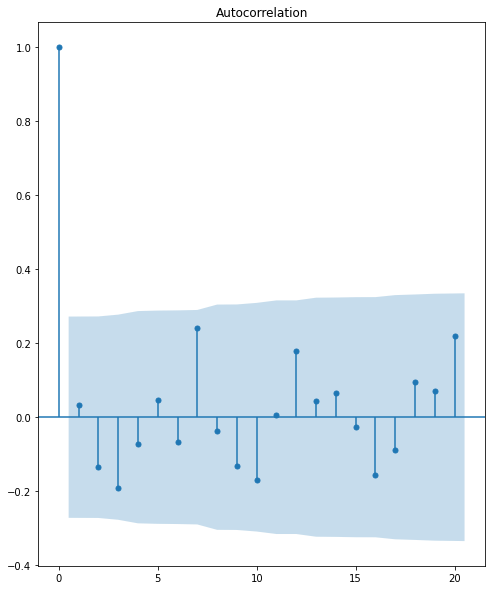

In [58]:
#difference of difference 
plot_acf(year_pred['first_diff_deficit'].dropna(),lags = 20); 

Based on the ACF plot there is no significant correlation. There is a sharp cutoff, but lag 1 is positive. 

# Arima Modeling scarcity from  data overall

In [59]:
X = year_pred[[ 'AverageTemperature', 'Average monthly precipitation', 'Population', 'precip_temp', 'temp_anomalies']]

y = year_pred['total_yield']

X = X.shift(1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 42, shuffle = False)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#X_train_lagged = scaler.fit_transform(X_train_lagged)
#X_test_lagged = scaler.transform(X_test_lagged)

In [61]:
#5.67
#mean_squared_error(pd.DataFrame(y_test).diff().diff().dropna(), preds[2:])

In [62]:
import itertools

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            continue

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 2, 2),
                                seasonal_order=(0, 2, 2, 10),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [63]:
y_test[1:].shape

(13,)

In [64]:
sarima = SARIMAX(endog = y_train[1:],
                 order = (0, 2, 1),              # (p, d, q)
                 seasonal_order = (1, 1, 1, 4),  # (P, D, Q, S)
                 exog = X_train[1:])



# Fit SARIMA model.


In [65]:
pd.DataFrame(X_test)

,0,1,2,3,4
0,-1.251943,-0.637203,1.619271,-0.734618,0.011687
1,-1.545873,-1.264010,1.632789,-1.517233,-0.381342
2,-1.247619,-1.669054,1.768646,-1.955228,0.089603
3,-0.976748,-1.687611,1.913151,-1.944940,0.611201
4,-1.168030,-1.898850,2.009745,-1.864454,0.311611
5,-1.341302,-1.813844,2.107049,-2.109226,0.001240
6,-1.191152,-1.455839,2.205325,-1.542233,0.305442
7,-1.354266,-0.953517,2.213107,-1.040648,0.220620
8,-1.103171,-0.839200,2.312201,-0.980152,0.668338
9,-1.515704,-0.867249,2.412052,-1.061579,-0.038385


225643632.7154042


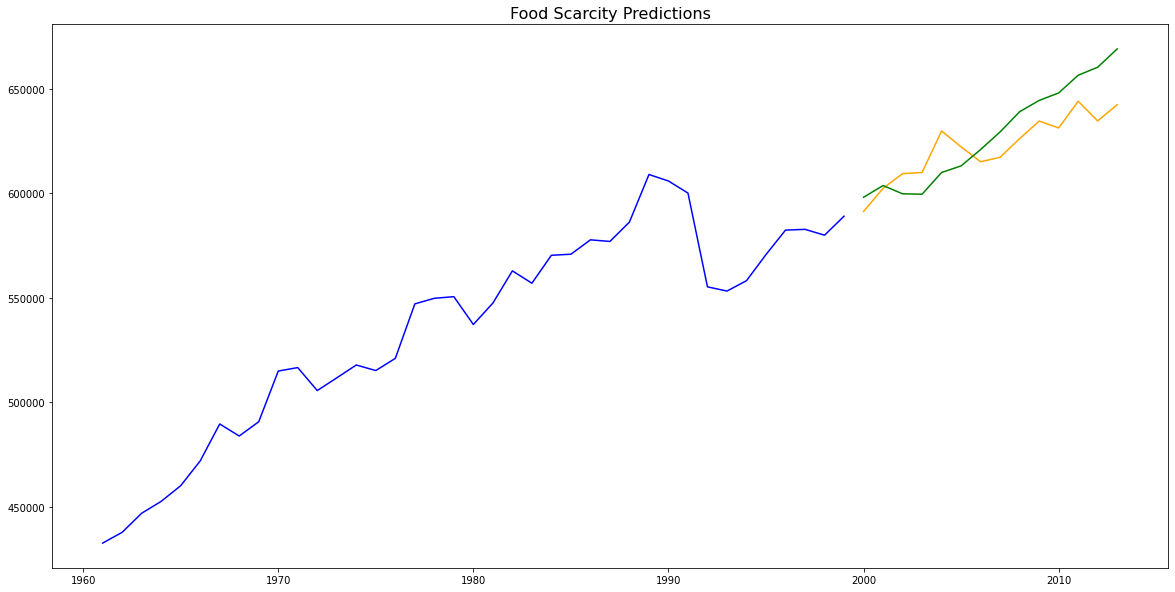

In [66]:
#model_using_lags

model = sarima.fit()

# Generate predictions based on test set.
preds = model.predict(start=datetime(2000,1,1),
                      end=datetime(2013,1,1),
                      exog=X_test)




# Evaluate predictions.
print(mean_squared_error(y_test[1:], preds[1:]))

# Plot data.
plt.figure(figsize=(20,10))
plt.plot(y_train, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'Food Scarcity Predictions', fontsize=16)
plt.show();
#111

## Seasonal ARIMA (SARIMA) model 

In [ ]:
# Starting MSE and (P, D, Q, S).
best_mse = 99 * (10 ** 16)
final_P = 0
final_D = 0
final_Q = 0
final_S = 0

for P in range(3): #trying everything the range
    for Q in range(3):
        for D in range(3):
            for S in range(0,40,4):
                try:
                    print(f'Attempting to fit SARIMAX(0,2,1)x({P},{D},{Q},{S})')
                    # Instantiate SARIMAX model.
                    sarimax = SARIMAX(endog = y_train,
                                     order = (0, 2, 1),              # (p, d, q)
                                     seasonal_order = (P, D, Q, S),  # (P, D, Q, S)
                                     exog = X_train.dropna()) 
 
                    # Fit SARIMAX model.
                    model = sarimax.fit()

                    # Generate predictions based on test set.
                    preds = model.predict(start=datetime(2009,1,1),
                                          end=datetime(2016,1,1),
                                          exog=X_test.dropna())

                    # Evaluate predictions.
                    print(f'The MSE for (0, 2, 1)x({P},{D},{Q},{S}) is: {mean_squared_error(y_test[1:len(y_test)-1], preds)}')

                    # Save for final report.
                    if best_mse > mean_squared_error(y_test[1:len(y_test)-1], preds):
                        best_mse = mean_squared_error(y_test[1:len(y_test)-1], preds)
                        final_P = P
                        final_D = D
                        final_Q = Q
                        final_S = S

                except:
                    pass

print(f'Our model that minimizes MSE on the testing data is the SARIMAX(0, 2, 1)x({final_P},{final_D},{final_Q},{final_S}).')
print(f'This model has an MSE of {best_mse}.')

Attempting to fit SARIMAX(0,2,1)x(0,0,0,0)
Attempting to fit SARIMAX(0,2,1)x(0,0,0,4)
Attempting to fit SARIMAX(0,2,1)x(0,0,0,8)
Attempting to fit SARIMAX(0,2,1)x(0,0,0,12)
Attempting to fit SARIMAX(0,2,1)x(0,0,0,16)
Attempting to fit SARIMAX(0,2,1)x(0,0,0,20)
Attempting to fit SARIMAX(0,2,1)x(0,0,0,24)
Attempting to fit SARIMAX(0,2,1)x(0,0,0,28)
Attempting to fit SARIMAX(0,2,1)x(0,0,0,32)
Attempting to fit SARIMAX(0,2,1)x(0,0,0,36)
Attempting to fit SARIMAX(0,2,1)x(0,1,0,0)
Attempting to fit SARIMAX(0,2,1)x(0,1,0,4)
Attempting to fit SARIMAX(0,2,1)x(0,1,0,8)
Attempting to fit SARIMAX(0,2,1)x(0,1,0,12)
Attempting to fit SARIMAX(0,2,1)x(0,1,0,16)
Attempting to fit SARIMAX(0,2,1)x(0,1,0,20)
Attempting to fit SARIMAX(0,2,1)x(0,1,0,24)
Attempting to fit SARIMAX(0,2,1)x(0,1,0,28)
Attempting to fit SARIMAX(0,2,1)x(0,1,0,32)
Attempting to fit SARIMAX(0,2,1)x(0,1,0,36)
Attempting to fit SARIMAX(0,2,1)x(0,2,0,0)
Attempting to fit SARIMAX(0,2,1)x(0,2,0,4)
Attempting to fit SARIMAX(0,2,1)x(0,2,0,

In [67]:
year_pred.columns

Index(['Unnamed: 0', 'index', 'cereals', 'potatoes', 'beans', 'sugar',
       'soybeans', 'palm-oil', 'cassava', 'rapeseed', 'total_yield',
       'Average monthly precipitation', 'AverageTemperature',
       'AverageTemperatureUncertainty', 'Surface temperature anomaly',
       'Population', 'yield_change', 'yield_percent_change',
       'goal_percent_change', 'yield_goal_diff', 'country_cat',
       'temp_anomalies', 'temp_pct_change', 'precip_change', 'precip_temp',
       'first_diff_deficit', 'second_diff_deficit', 'third_diff_deficit'],
      dtype='object')

239816787.70261383


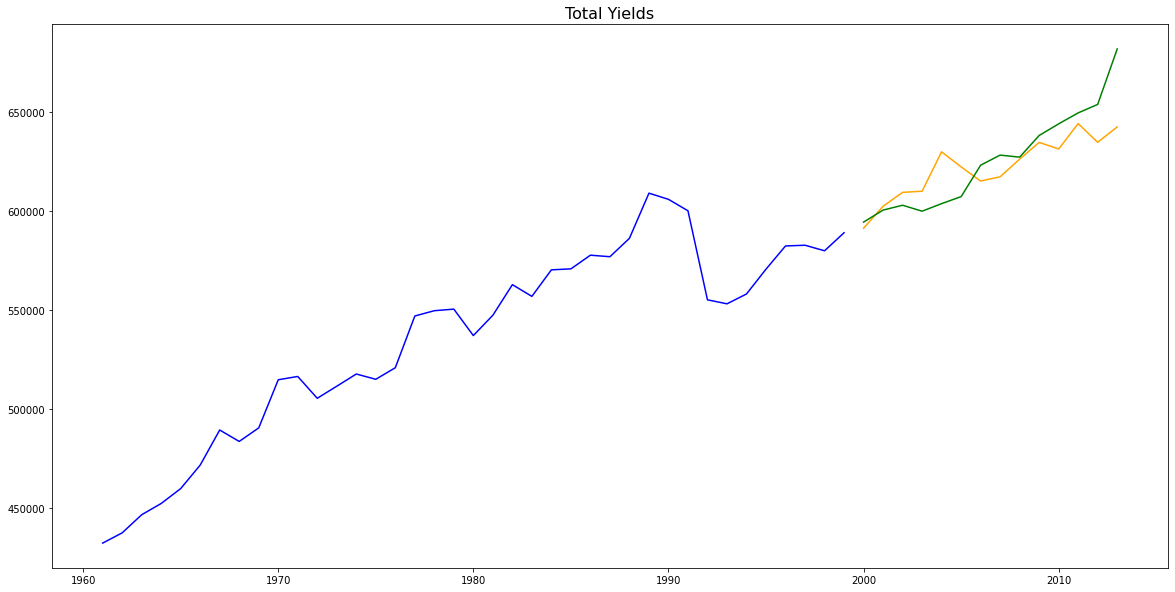

In [68]:
X = year_pred[[ 'AverageTemperature', 'Average monthly precipitation', 'Population', 'precip_temp', 'temp_anomalies','precip_change', 'temp_pct_change']]

y = year_pred['total_yield']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 42, shuffle = False)



sarima = SARIMAX(endog = y_train,
                 order = (0, 2, 1),              # (p, d, q)
                 seasonal_order = (1, 1, 1, 4),  # (P, D, Q, S)
                 exog = X_train)



# Fit SARIMA model.
model = sarima.fit()



# Generate predictions based on test set.
preds = model.predict(start=datetime(2000,1,1),
                      end=datetime(2013,1,1),
                      exog=X_test)


# Evaluate predictions.
print(mean_squared_error(y_test, preds))

# Plot data.
plt.figure(figsize=(20,10))
plt.plot(y_train, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'Total Yields', fontsize=16)
plt.show();

In [70]:
forecast = model.forecast(exog = X_test[-1:])[0]

forecast

436215.97340902337

In [71]:
forecasts = model.forecast(exog = X_train,steps=39)

forecasts

2000-01-01    1.101242e+06
2001-01-01    1.100973e+06
2002-01-01    1.113870e+06
2003-01-01    1.119315e+06
2004-01-01    1.121532e+06
2005-01-01    1.125448e+06
2006-01-01    1.148169e+06
2007-01-01    1.154586e+06
2008-01-01    1.145606e+06
2009-01-01    1.158469e+06
2010-01-01    1.179047e+06
2011-01-01    1.183501e+06
2012-01-01    1.176449e+06
2013-01-01    1.195723e+06
2014-01-01    1.210078e+06
2015-01-01    1.216045e+06
2016-01-01    1.215298e+06
2017-01-01    1.223396e+06
2018-01-01    1.225857e+06
2019-01-01    1.231482e+06
2020-01-01    1.241053e+06
2021-01-01    1.250748e+06
2022-01-01    1.260285e+06
2023-01-01    1.267583e+06
2024-01-01    1.265228e+06
2025-01-01    1.277539e+06
2026-01-01    1.290636e+06
2027-01-01    1.287081e+06
2028-01-01    1.297353e+06
2029-01-01    1.306869e+06
2030-01-01    1.311970e+06
2031-01-01    1.325893e+06
2032-01-01    1.335788e+06
2033-01-01    1.348988e+06
2034-01-01    1.359309e+06
2035-01-01    1.370030e+06
2036-01-01    1.374869e+06
2

In [72]:
y_test

Year-month
2000-01-01    591203.131250
2001-01-01    602267.622642
2002-01-01    609287.525316
2003-01-01    609860.392405
2004-01-01    629698.962025
2005-01-01    622112.373418
2006-01-01    614987.325000
2007-01-01    617133.225000
2008-01-01    626028.962500
2009-01-01    634466.331250
2010-01-01    631148.650000
2011-01-01    643935.793750
2012-01-01    634528.105590
2013-01-01    642279.689441
Name: total_yield, dtype: float64

In [73]:
miti_year_pred

,Population,total_yield,AverageTemperature,temp_pct_change,Average monthly precipitation,precip_change,precip_temp,log_pop
Year-month,,,,,,,,
1961-01-01,2.148764e+07,432506.526316,19.461407,-0.280834,10.239212,2.275065,220.210559,16.882988
1962-01-01,2.189171e+07,437669.917293,19.263760,-0.081943,10.012969,-0.024870,214.254432,16.901618
1963-01-01,2.231135e+07,446792.368421,19.263734,-0.058401,10.381205,0.109248,222.061870,16.920606
1964-01-01,2.274958e+07,452464.255639,19.201430,-0.036764,9.892779,-0.048685,211.078204,16.940057
1965-01-01,2.320826e+07,459991.939850,19.128979,-0.085096,9.828913,0.012219,206.658077,16.960019
...,...,...,...,...,...,...,...,...
2096-01-01,1.014869e+08,NaN,22.029000,-0.002716,15.604000,0.001155,343.740516,18.435441
2097-01-01,1.015403e+08,NaN,21.909000,-0.005447,15.622000,0.001154,342.262398,18.435966
2098-01-01,1.015860e+08,NaN,22.009000,0.004564,15.640000,0.001152,344.220760,18.436416


In [74]:
pop = miti_year_pred['Population']

pop = pd.DataFrame(pop)
pop_df = pop[pop.index.year > 1999]

pop_df = pop_df[pop_df.index.year < 2039]

pop_df

,Population
Year-month,
2000-01-01,3.795841e+07
2001-01-01,3.863364e+07
2002-01-01,3.935185e+07
2003-01-01,3.983194e+07
2004-01-01,4.031556e+07
2005-01-01,4.080401e+07
2006-01-01,4.084268e+07
2007-01-01,4.133519e+07
2008-01-01,4.183147e+07


In [75]:
forecast_df = pd.DataFrame(forecasts)
forecast_df

,predicted_mean
2000-01-01,1.101242e+06
2001-01-01,1.100973e+06
2002-01-01,1.113870e+06
2003-01-01,1.119315e+06
2004-01-01,1.121532e+06
2005-01-01,1.125448e+06
2006-01-01,1.148169e+06
2007-01-01,1.154586e+06
2008-01-01,1.145606e+06
2009-01-01,1.158469e+06


In [76]:
pop_preds = pd.merge(forecast_df, pop_df, how = 'outer', left_index = True, right_index = True)

In [77]:
pop_preds['log_yield'] = np.log10(pop_preds['predicted_mean'])

In [78]:
pop_preds.head()

,predicted_mean,Population,log_yield
2000-01-01,1.101242e+06,3.795841e+07,6.041883
2001-01-01,1.100973e+06,3.863364e+07,6.041777
2002-01-01,1.113870e+06,3.935185e+07,6.046835
2003-01-01,1.119315e+06,3.983194e+07,6.048952
2004-01-01,1.121532e+06,4.031556e+07,6.049811


In [79]:
pop_preds['log_pop'] = np.log10(pop_preds['Population'])

pop_preds

,predicted_mean,Population,log_yield,log_pop
2000-01-01,1.101242e+06,3.795841e+07,6.041883,7.579308
2001-01-01,1.100973e+06,3.863364e+07,6.041777,7.586966
2002-01-01,1.113870e+06,3.935185e+07,6.046835,7.594965
2003-01-01,1.119315e+06,3.983194e+07,6.048952,7.600231
2004-01-01,1.121532e+06,4.031556e+07,6.049811,7.605473
2005-01-01,1.125448e+06,4.080401e+07,6.051325,7.610703
2006-01-01,1.148169e+06,4.084268e+07,6.060006,7.611114
2007-01-01,1.154586e+06,4.133519e+07,6.062426,7.616320
2008-01-01,1.145606e+06,4.183147e+07,6.059035,7.621503
2009-01-01,1.158469e+06,4.232963e+07,6.063884,7.626644


In [80]:
#pop_preds.to_csv('data/population_forecast.csv')

## Predictions with Mitigation

In [82]:
miti_year_pred.columns

Index(['Population', 'total_yield', 'AverageTemperature', 'temp_pct_change',
       'Average monthly precipitation', 'precip_change', 'precip_temp',
       'log_pop'],
      dtype='object')

In [83]:
features = miti_year_pred[['log_pop',  'AverageTemperature', 'temp_pct_change',
       'Average monthly precipitation', 'precip_change', 'precip_temp']]

#features.fillna(0, inplace = True)

labels = miti_year_pred['total_yield']

X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size =0.62, random_state = 42, shuffle = False)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
y_train.shape

(53,)

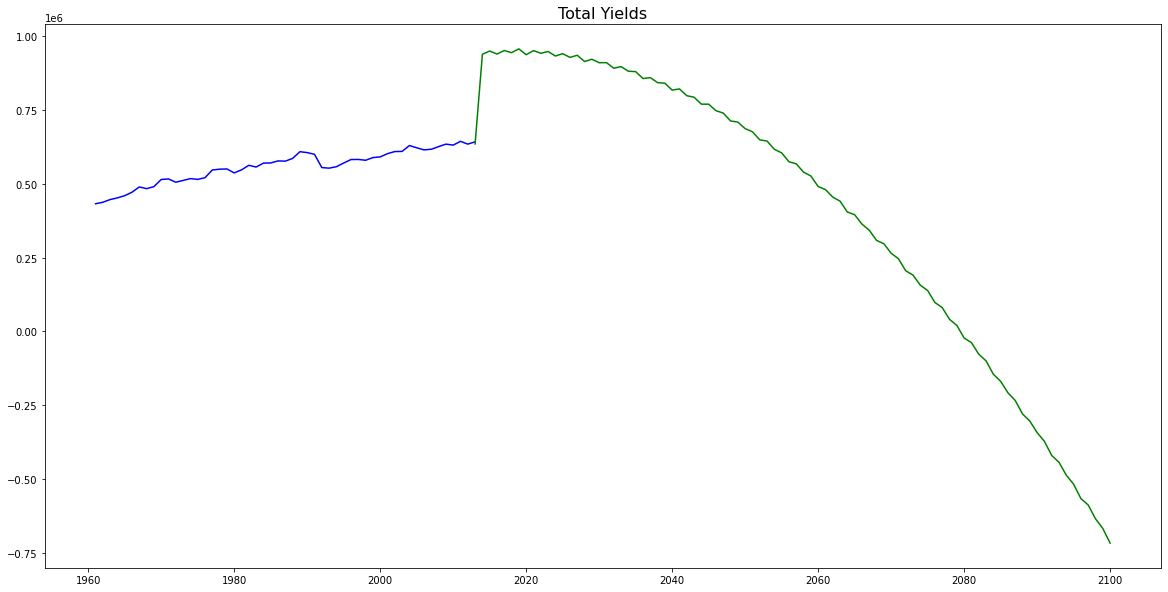

In [85]:
#endog is y train
sarima = SARIMAX(endog = y_train,
                 order = (0, 2, 1),              # (p, d, q)
                 seasonal_order = (1, 1, 1, 4),  # (P, D, Q, S)
                 exog = X_train)

#ARIMA(0, 2, 2)x(0, 2, 2, 10)12

# Fit SARIMA model.
model_miti = sarima.fit()

# Generate predictions based on test set.
preds_miti = model_miti.predict(start=datetime(2013,1,1),
                      end=datetime(2100,1,1),
                      exog=X_test)

#print(mean_squared_error(y_test[2:], preds_miti))

# Plot data.
plt.figure(figsize=(20,10))
plt.plot(y_train, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.plot(preds_miti, color = 'green')
plt.title(label = 'Total Yields', fontsize=16)
plt.show();

# Predictions without Mitigation 

In [86]:
features_no_mit = no_miti_year_pred[['log_pop',  'AverageTemperature', 'temp_pct_change',
       'Average monthly precipitation', 'precip_change', 'precip_temp']]

features_no_mit.fillna(0, inplace = True)


label_no_mit = no_miti_year_pred[['total_yield']]

X_train, X_test, y_train, y_test = train_test_split(features_no_mit,label_no_mit, test_size =0.62, random_state = 42, shuffle = False)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


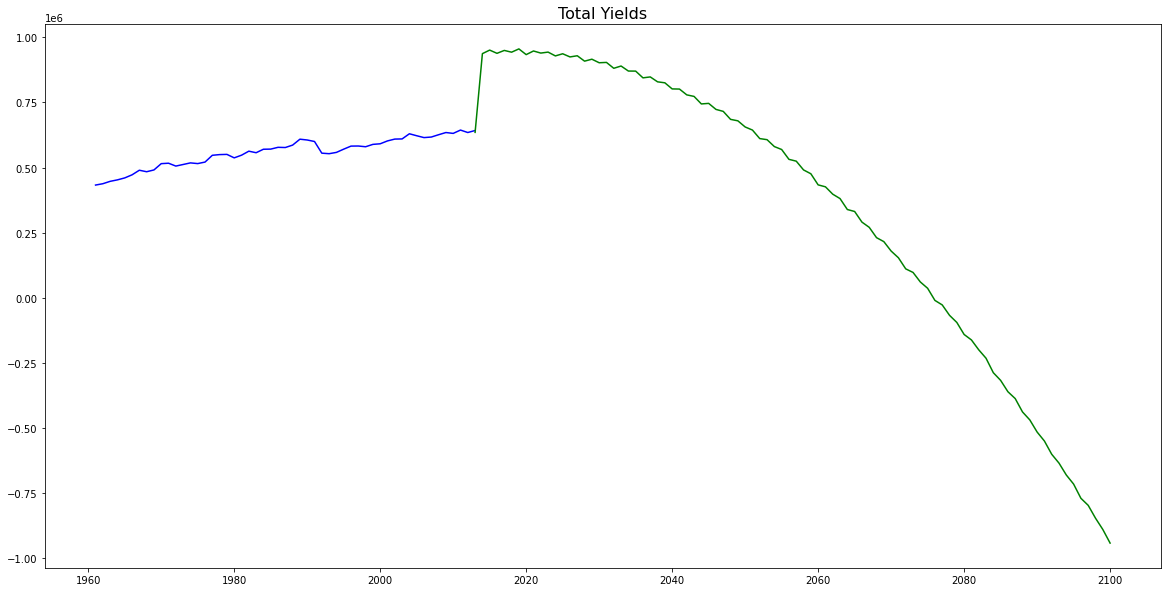

In [87]:
#endog is y train
sarima = SARIMAX(endog = y_train,
                 order = (0, 2, 1),              # (p, d, q)
                 seasonal_order = (1, 1, 1, 4),  # (P, D, Q, S)
                 exog = X_train)

#ARIMA(0, 2, 2)x(0, 2, 2, 10)12

# Fit SARIMA model.
model_no_miti = sarima.fit()

# Generate predictions based on test set.
preds_no_miti = model_miti.predict(start=datetime(2013,1,1),
                      end=datetime(2100,1,1),
                      exog=X_test)

#print(mean_squared_error(y_test[2:], preds_miti))

# Plot data.
plt.figure(figsize=(20,10))
plt.plot(y_train, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.plot(preds_no_miti, color = 'green')
plt.title(label = 'Total Yields', fontsize=16)
plt.show();

In [88]:
preds

2000-01-01    594287.571575
2001-01-01    600348.971376
2002-01-01    602788.807144
2003-01-01    599792.872871
2004-01-01    603592.299727
2005-01-01    607133.947920
2006-01-01    622985.874704
2007-01-01    628056.223107
2008-01-01    627027.835944
2009-01-01    637961.016175
2010-01-01    643806.605449
2011-01-01    649341.563080
2012-01-01    653605.219410
2013-01-01    681584.383729
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [89]:
pd.DataFrame(preds_miti)

,predicted_mean
2013-01-01,635099.980638
2014-01-01,938928.316736
2015-01-01,949791.432889
2016-01-01,939492.312993
2017-01-01,951535.561841
...,...
2096-01-01,-565723.664908
2097-01-01,-587735.613141
2098-01-01,-634304.915937
2099-01-01,-666960.151763


In [90]:
pd.DataFrame(preds_no_miti)

,predicted_mean
2013-01-01,635099.980638
2014-01-01,937812.729935
2015-01-01,951408.980239
2016-01-01,939019.046945
2017-01-01,950145.623380
...,...
2096-01-01,-771856.627592
2097-01-01,-799059.426381
2098-01-01,-848389.484113
2099-01-01,-891676.049143


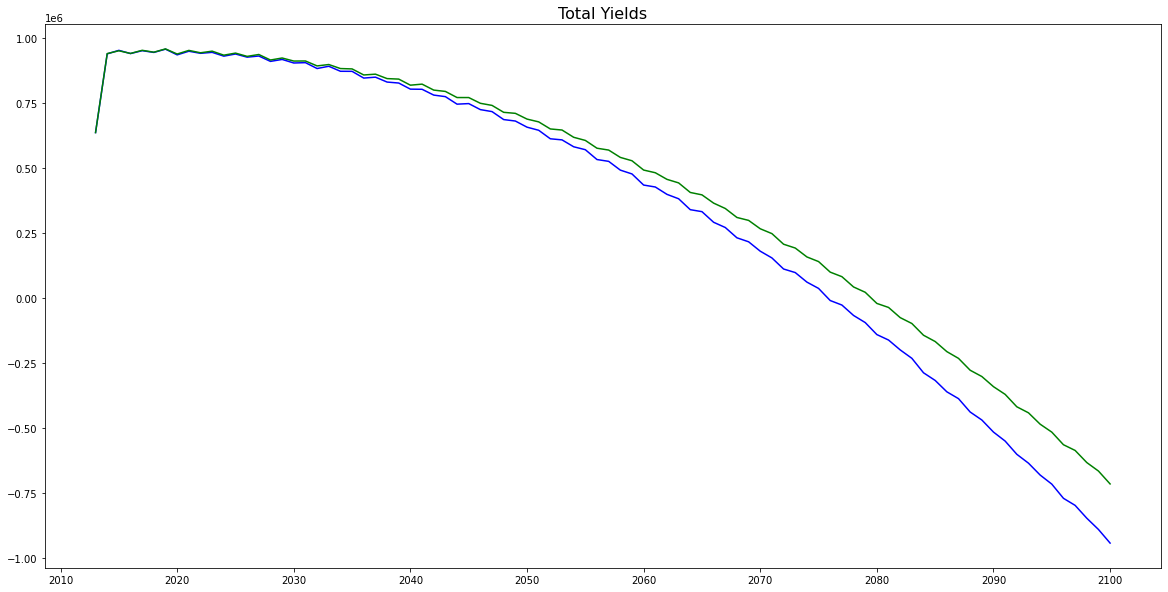

In [91]:
plt.figure(figsize=(20,10))
plt.plot(preds_no_miti, color = 'blue')
plt.plot(preds_miti, color = 'green')
plt.title(label = 'Total Yields', fontsize=16)
plt.show();